In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
data_feature = pd.read_csv("./Dataset/train_feature.csv")
data_label = pd.read_csv("./Dataset/train_label.csv")
test_feature = pd.read_csv("./Dataset/test_feature.csv")

In [5]:
data_label.describe()

,label
count,10000.000000
mean,1.488900
std,1.116155
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


## 开始数据合并与预处理

In [6]:
data = pd.concat([data_feature,data_label],axis=1)

In [7]:
names = data.columns
cntnull = []
for i in range(len(names)):
    cntnull.append(data[names[i]].isnull().sum())
max(cntnull), min(cntnull), sum(cntnull)/len(cntnull)


(70, 0, 49.06611570247934)

In [8]:
# 测试一下全部删去空值的时候剩下什么
data0 = data.copy(deep=True).dropna()
data0

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0,2
6,56.0,4.256328,5838.357604,9.0,5.0,222.0,61.0,6.0,2.0,0.408384,...,0.758844,44.0,0.029199,11.567181,0.0,63.0,0.226799,2.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,50.0,6.267244,0.446096,11.0,2.0,186.0,47.0,9.0,8.0,0.586553,...,2.267124,44.0,0.132499,1.310972,2.0,63.0,0.039158,3.0,44.0,1
9995,67.0,1.279090,0.143929,10.0,3.0,210.0,51.0,8.0,1.0,0.670449,...,1.435415,50.0,0.607483,1.328274,4.0,49.0,0.707751,1.0,52.0,1
9996,56.0,4.814346,0.697155,6.0,6.0,267.0,44.0,9.0,2.0,0.580825,...,0.334893,63.0,0.237845,1.219853,1.0,55.0,0.555282,4.0,52.0,3
9997,57.0,-0.271178,0.579603,8.0,5.0,168.0,57.0,8.0,5.0,14.266668,...,1.366215,45.0,0.491556,1.428329,2.0,59.0,1.565160,2.0,41.0,0


清理了太多数据，考虑还是填充，用前一行的值填补空值

In [9]:
data = data.fillna(method='pad', axis=0)

In [10]:
data['feature_116'].describe()

count     10000.00000
mean       1526.86640
std       22861.25555
min          24.00000
25%          45.00000
50%          50.00000
75%          54.00000
max      632196.00000
Name: feature_116, dtype: float64

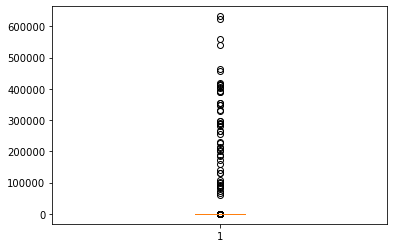

In [11]:
x = list(data['feature_116'].dropna())				#数据集
plt.boxplot(x)    				#垂直显示箱线图
plt.show()						#显示该图

In [12]:
(data['feature_116']>10000).describe(), (data['feature_116']>100).describe()

(count     10000
 unique        2
 top       False
 freq       9947
 Name: feature_116, dtype: object,
 count     10000
 unique        2
 top       False
 freq       9947
 Name: feature_116, dtype: object)

116属性里面有53个异常数据

In [13]:
(data['feature_119']>100).describe()

count     10000
unique        2
top       False
freq       9944
Name: feature_119, dtype: object

同理，119里面有56个，那合理怀疑前面的也有这种异常大的数据存在

In [14]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0,2
4,49.0,-6.160454,0.709718,9.0,3.0,240.0,57.0,6.0,1.0,3.189316,...,1.068687,54.0,0.600518,4.988225,7.0,52.0,1.187483,2.0,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.0,1.279090,0.143929,10.0,3.0,210.0,51.0,8.0,1.0,0.670449,...,1.435415,50.0,0.607483,1.328274,4.0,49.0,0.707751,1.0,52.0,1
9996,56.0,4.814346,0.697155,6.0,6.0,267.0,44.0,9.0,2.0,0.580825,...,0.334893,63.0,0.237845,1.219853,1.0,55.0,0.555282,4.0,52.0,3
9997,57.0,-0.271178,0.579603,8.0,5.0,168.0,57.0,8.0,5.0,14.266668,...,1.366215,45.0,0.491556,1.428329,2.0,59.0,1.565160,2.0,41.0,0
9998,52.0,-1.022212,0.839743,8.0,1.0,242.0,37.0,10.0,3.0,0.695831,...,0.561938,55.0,0.508272,3.113039,1.0,60192.0,0.727227,3.0,65.0,0


In [15]:
(data['feature_5']).describe()

count    1.000000e+04
mean     5.137623e+03
std      8.306486e+04
min      0.000000e+00
25%      1.620000e+02
50%      1.940000e+02
75%      2.220000e+02
max      2.072000e+06
Name: feature_5, dtype: float64

**注：** 之前处理方式在最后的建模预测中的表现并不好模型都只有不到30%的准确率，因此重新预处理

In [16]:
datanames = names.drop('label')
list100 = []
for obj in datanames:
    if np.median(data[obj]) > 100:
        list100.append(0)
    elif np.median(data[obj]) <= 100 and np.median(data[obj]) > 10:
        list100.append(1)
    else:
        list100.append(2)
print(list100)

[1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


In [17]:
data['feature_0'].dtype

dtype('float64')

In [18]:
# 找整型列，由于数据将整型保存成float64而不是int64/32，故只能重新判断
def judgeint(data, colnames):
    # 如果超过95%的数据都是整数就认为是整数，并将数据处理成整数
    jud = []
    for obj in colnames:
        cnt = 0
        for i in data[obj]:
            if i.is_integer():
                cnt += 1
        if cnt/len(data[obj]) > 0.95:
            data[obj] = data[obj].astype(np.int64)
            jud.append(1)
        else:
            jud.append(0)
    return jud
    

In [19]:
list_isint = judgeint(data, datanames)
print(list_isint)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]


In [204]:
# # 对float的列进行预处理
# data_float_names = data.select_dtypes(include=float).columns
# data1 = data.copy(deep=True)
# def sigmoid(X):
#     if X >= 0:
#         return 1.0 / (1 + np.exp(-X))
#     else:   # 防止上溢
#         return np.exp(X)/(np.exp(X)+1)
# # 考虑到平均数由异常值的影响很大，掐头去尾取平均数和取中位数区别不大，取中位数来减
# for obj in data_float_names:
#     med = np.median(data1[obj])
#     data1[obj] = data1[obj]-med
#     for i in range(len(data1[obj])):
#         data1[obj][i] = sigmoid(data1[obj][i])
    
# data1

In [91]:
data1 = data.copy(deep=True)
# # data_int_names = data.select_dtypes(include=int).columns.drop('label')
# # data_float_names = data.select_dtypes(include=float).columns

# 如果出现异常数据就用5%和95%的分位数取取边界值
for obj in datanames:
    # 肉眼观察最大值都大于0
    if (max(data1[obj])>=0 and np.percentile(data1[obj], 95)>=0) and max(data1[obj]) > np.percentile(data1[obj], 95)*100:
        data1[obj][data1[obj]>np.percentile(data1[obj], 95)] = np.percentile(data1[obj], 95)
    # 最小值分类处理
    if (min(data1[obj])>=0 and np.percentile(data1[obj], 5)>=0) and np.percentile(data1[obj], 5)-min(data1[obj]) > np.percentile(data1[obj], 95)/100:
        data1[obj][data1[obj]<np.percentile(data1[obj], 5)] = np.percentile(data1[obj], 5)
    if (min(data1[obj])<0 and np.percentile(data1[obj], 5)>=0) and np.percentile(data1[obj], 5)+min(data1[obj]) < min(data1[obj])/100:
        data1[obj][data1[obj]<np.percentile(data1[obj], 5)] = np.percentile(data1[obj], 5)
    if (min(data1[obj])<0 and np.percentile(data1[obj], 5)<0) and np.abs(np.percentile(data1[obj], 5)-min(data1[obj])) > np.abs(min(data1[obj])/100):
        data1[obj][data1[obj]<np.percentile(data1[obj], 5)] = np.percentile(data1[obj], 5)
    # # 归一化
    # data1[obj] = (data1[obj]-np.min(data1[obj]))/(np.max(data1[obj])-np.min(data1[obj]))   

## 小波变换去噪
import pywt

w = pywt.Wavelet('db8')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data1), w.dec_len)
threshold = 0.2  # Threshold for filtering
for obj in datanames:
    lis = list(data1[obj])
    coeffs = pywt.wavedec(lis, 'db8', level=maxlev)  # 将信号进行小波分解
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波
    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
    data1[obj] = datarec

C:\Users\20123\AppData\Local\Temp/ipykernel_3368/4067329763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[obj][data1[obj]>np.percentile(data1[obj], 95)] = np.percentile(data1[obj], 95)
C:\Users\20123\AppData\Local\Temp/ipykernel_3368/4067329763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[obj][data1[obj]<np.percentile(data1[obj], 5)] = np.percentile(data1[obj], 5)
C:\Users\20123\AppData\Local\Temp/ipykernel_3368/4067329763.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [92]:
data1

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,47.845042,6.573727,0.161104,6.403413,3.933724,217.497487,47.730239,7.842683,2.529695,2.705949,...,0.939187,44.707326,0.140899,2.488341,0.351185,48.485423,1.303365,1.782620,50.420674,0
1,47.798520,-11.180121,0.534687,9.113712,3.243493,157.527464,48.126192,7.436167,2.299441,2.592263,...,0.889274,55.255558,0.661187,4.120156,0.778675,43.547844,0.538352,1.812900,47.504671,0
2,51.949880,3.364694,0.270831,7.423391,2.455442,227.198544,48.185355,6.651749,1.695024,2.800268,...,0.821068,55.267186,0.728334,3.993271,1.844840,53.933791,1.354138,1.703431,45.106766,0
3,51.773459,5.525551,0.307101,7.977140,3.105506,192.130188,43.148031,7.766001,1.378197,2.994769,...,0.806432,57.779541,0.169429,5.181636,1.544736,53.745669,0.764895,1.584312,42.191909,2
4,48.513779,-2.542518,0.689279,7.986304,3.372349,215.139682,54.337638,6.578284,1.623128,3.095930,...,0.805110,51.130683,0.582694,4.107318,3.873311,51.891107,1.155409,1.867461,43.692459,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,57.793970,3.989251,0.447398,8.773465,3.250243,197.562121,50.621306,8.248438,1.245856,2.285148,...,1.512824,50.281449,0.443650,2.328350,3.146931,49.799844,0.852492,1.372668,51.648562,1
9996,54.798583,3.404005,0.623274,6.743573,4.745438,222.271921,46.768947,8.004469,2.113303,1.314659,...,0.740331,58.925174,0.277291,2.067634,1.655270,55.141202,1.042938,2.681528,54.032335,3
9997,51.789150,2.078580,0.617104,7.702516,4.282364,160.557883,53.449733,8.016304,3.511304,10.623468,...,1.415569,45.603998,0.337076,1.915265,1.957277,55.250141,1.132279,1.998136,45.332954,0
9998,48.615279,1.267875,0.656263,7.871225,1.971666,222.461532,42.912996,8.909926,1.961712,2.135458,...,0.707545,53.625828,0.400513,1.851748,1.926886,59.493291,1.024407,2.461506,58.071487,0


(10000, 10000) (120,) (120, 120)


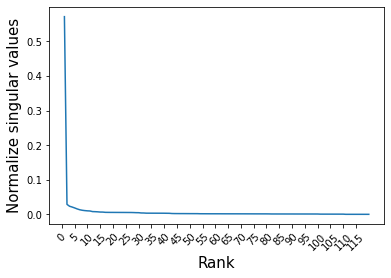

In [93]:
# 利用奇异值分解确定降维

data2 = data1.copy(deep=True)
x0 = np.array(data2)
x0 = x0[:,:-1]
m,n = x0.shape
## 奇异值分解
U,S,V = np.linalg.svd(x0)  
print(U.shape,S.shape,V.shape)
S_list = list(S)
## 奇异值求和
S_sum = sum(S)
##奇异值序列归一化
S_normalization_list = [x/S_sum for x in S_list]

X = []
for i in range(len(S_normalization_list)):
    X.append(i+1)

fig1 = plt.figure().add_subplot(111)
fig1.plot(X,S_normalization_list)
# fig1.set_xticks(X)
fig1.set_xlabel('Rank',size = 15)
plt.xticks(range(0,len(X),5)) #每5个点显示一次
# 下面的rotation表示的是旋转角度
plt.xticks(rotation = 45)
fig1.set_ylabel('Normalize singular values',size = 15)
plt.savefig("svd.pdf",bbox_inches = 'tight')
plt.show()



In [124]:
## 数据重构
k = 11 ## 保留的奇异值阶数11
V_T_kxn = V[:k,:]

reduceNoiseMat = np.array(np.dot(V_T_kxn, np.mat(x0).T).T)
reduceNoiseMat.shape, reduceNoiseMat

((10000, 11),
 array([[-379.47605774,  -21.65416422,   -2.62315497, ...,   -1.19980795,
           -5.9790927 ,    5.23488439],
        [-338.1008312 ,   26.74641786,   -6.98812817, ...,    9.823755  ,
           -5.97096435,   -2.38774293],
        [-385.48433733,  -28.99251544,    1.4644935 , ...,    4.69800793,
            8.25225297,   -1.68722445],
        ...,
        [-348.39401306,   31.1570448 ,    7.57428453, ...,    4.0153582 ,
           -6.03981423,    5.07525527],
        [-382.70228722,  -27.50288351,    7.07418145, ...,   -1.80960099,
           -6.76726038,    4.00209693],
        [-348.09236284,   -4.2206452 ,   16.61340853, ...,   -3.06355578,
           -8.68532443,    2.48388323]]))

In [127]:
data3 = pd.DataFrame()
for i in range(reduceNoiseMat.shape[1]):
    data3[datanames[i]] = list(reduceNoiseMat[:,i])
data3[names[-1]] = data2[names[-1]]
data3

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,-379.476058,-21.654164,-2.623155,26.853231,25.472097,-19.615445,1.338796,-11.448556,-1.199808,-5.979093,5.234884,0
1,-338.100831,26.746418,-6.988128,25.285657,7.297526,-19.543693,-3.419809,-3.803454,9.823755,-5.970964,-2.387743,0
2,-385.484337,-28.992515,1.464493,-4.127039,-19.721764,-16.345585,7.280149,-7.385921,4.698008,8.252253,-1.687224,0
3,-350.582763,-15.267897,-12.967149,18.741302,23.021877,2.314732,-2.749612,3.702500,1.554905,14.881587,4.143999,2
4,-372.771322,-21.401662,-9.955029,-16.747700,28.084089,17.320850,-8.393350,-3.238443,-9.912459,10.873626,2.909371,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-370.952430,2.854775,-1.045087,5.746846,14.476716,-1.367972,5.085759,-6.805689,-3.357961,1.048650,-2.907645,1
9996,-382.646221,-24.977591,-1.556585,-11.295939,16.463789,-8.465985,10.101894,13.130806,4.984767,2.124277,-8.034119,3
9997,-348.394013,31.157045,7.574285,3.701310,-3.552685,21.302643,14.538086,2.090994,4.015358,-6.039814,5.075255,0
9998,-382.702287,-27.502884,7.074181,22.460883,14.854184,-15.332829,12.368336,5.636382,-1.809601,-6.767260,4.002097,0


In [149]:
# (data2['feature_1']).describe()
print(np.max(data3))
print(np.min(data3))

feature_0    -307.493784
feature_1      58.359089
feature_2      42.246231
feature_3      39.113488
feature_4      33.256863
feature_5      26.585818
feature_6      25.126207
feature_7      24.129647
feature_8      26.970696
feature_9      18.094795
feature_10     25.175043
label           3.000000
dtype: float64
feature_0    -400.276569
feature_1     -55.981369
feature_2     -40.862425
feature_3     -37.125049
feature_4     -31.039385
feature_5     -29.915214
feature_6     -24.997641
feature_7     -26.332257
feature_8     -23.814017
feature_9     -18.425411
feature_10    -21.266271
label           0.000000
dtype: float64


看起来不错，预处理到这里就可以了

In [154]:
# 切分训练测试数据集
def split_train_test(data, test_ratio):
    np.random.seed(46)
    shuffled_indices = np.random.permutation(len(data))  # 生成和原数据等长的无序索引
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train,test = split_train_test(data3, 0.1)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [155]:
datanames = data3.columns.drop('label')
X_train,X_test = train[datanames],test[datanames]
y_train,y_test = train['label'],test['label']

In [99]:
def acc(pred,test):
    cnt = 0
    for i in range(len(pred)):
        if pred[i] == test[i]:
            cnt += 1
    return cnt/len(pred)

### 多分类逻辑回归

In [156]:
import time
from tqdm import tqdm

class LogisticRegresion(object):
    def __init__(self,max_iter=1000,learning_rate=0.1):
        self.w = None
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def softmax(self, a):
        # 处理一下溢出
        c = np.max(a)
        exp_a = np.exp(a-c)#溢出对策
        sum_exp_a = np.sum(exp_a)
        y = exp_a/sum_exp_a
        return y
    
    def model(self, X, theta):
        return self.softmax((X@theta))
    
    def gradient(self, X, y, theta):
        # 梯度计算函数
        grad = np.zeros(X.shape[1])
        error = (self.model(X, theta)- y)
        grad = np.dot(X.T, error)/len(X)
        
        return grad
    
    # def cost(self, X, y, theta):
    #     # 利用对数似然计算损失
    #     left = np.multiply(-y, np.log(self.model(X, theta)))
    #     right = np.multiply(1 - y, np.log(1 - self.model(X, theta)))
    #     return np.sum(left - right) / (len(X))


    def fit(self,X,Y):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.n_classes = len(Y)
        W = np.zeros((np.size(X, 1), self.n_classes))
        t0 = time.time()
        for _ in tqdm(range(self.max_iter), desc='Processing'):
            # print(W)
            W_prev = np.copy(W)
            Y_hat = self.softmax(X @ W)
            grad = self.gradient(X,Y,W)
            W -= self.learning_rate * grad
            if np.allclose(W, W_prev, rtol=1e-3):
                t1 = time.time()
                # print()
                break
            t1 = time.time()
        self.w = W
        print("一共用时："+str(t1-t0)+"s")

    def predict_prob(self,X):
        X = np.hstack([X,np.ones((X.shape[0],1))])
        pred_y = self.softmax((X @ self.w)/np.max(X @ self.w))
        return pred_y

    def predict(self,X):
        return np.argmax(self.predict_prob(X),axis=1)

In [232]:
model = LogisticRegresion(max_iter=100)
model.fit(np.array(X_train), np.array(y_train))


Processing: 100%|██████████| 100/100 [08:08<00:00,  4.89s/it]

一共用时：488.5729990005493s


In [233]:
pred = model.predict(X_test)
acc(pred, y_test)



0.249

In [159]:
predict_prob = model.predict_prob(np.array(X_test))
predict_prob
X=np.array(X_test)
X=np.hstack([X,np.ones((X.shape[0],1))])
def softmax(a):
	c = np.max(a)
	exp_a = np.exp(a - c) # 溢出对策
	sum_exp_a = np.sum(exp_a)
	y = exp_a / sum_exp_a
	return y
X@model.w,softmax((X@model.w)/np.percentile(X@model.w,95)),(softmax(X@model.w)).shape

(array([[390242.98052586, 390242.98052586, 390242.98052586, ...,
         130080.99559893, 130080.99559893, 390242.98052586],
        [370495.61544212, 370495.61544212, 370495.61544212, ...,
         123498.54044521, 123498.54044521, 370495.61544212],
        [388376.99182942, 388376.99182942, 388376.99182942, ...,
         129458.99934003, 129458.99934003, 388376.99182942],
        ...,
        [353177.02704711, 353177.02704711, 353177.02704711, ...,
         117725.67754382, 117725.67754382, 353177.02704711],
        [387802.7677692 , 387802.7677692 , 387802.7677692 , ...,
         129267.59132123, 129267.59132123, 387802.7677692 ],
        [377280.53686232, 377280.53686232, 377280.53686232, ...,
         125760.18096303, 125760.18096303, 377280.53686232]]),
 array([[1.71734129e-07, 1.71734129e-07, 1.71734129e-07, ...,
         8.95298103e-08, 8.95298103e-08, 1.71734129e-07],
        [1.63449718e-07, 1.63449718e-07, 1.63449718e-07, ...,
         8.80663883e-08, 8.80663883e-08, 1.6344

### 决策树

In [241]:
# 节点
class Node(object):
    def __init__(self, feature_index=None, threshold=None, value=None, left_tree=None, right_tree=None):
        self.feature_index = feature_index  # 特征下标
        self.threshold = threshold          # 划分临界点
        self.value = value                  # 叶节点权重(只有叶节点有)
        self.left_tree = left_tree          # 左子树：小于临界值
        self.right_tree = right_tree        # 右子树：大于临界值


# 参数说明：最小划分样本数，最小划分增益，最大深度，gamma,lambda
class DecisionTree(object):
    def __init__(self, min_samples=5, min_split_gain=1e-7, max_depth=4, gamma=0, lam=1):
        self.min_samples = min_samples
        self.min_split_gain = min_split_gain
        self.max_depth = max_depth
        self.gamma = gamma
        self.lam = lam
        self.root = None

    def gradient(self, y, y_pre):
        "一阶导"
        return -2*(y - y_pre)

    def hess(self, y, y_pre):
        "二阶导"
        return 2*np.ones_like(y)

    def split(self, y):
        "传入回归树的 y 有2列，第一列为真实值，第二列为预测值"
        y_true = y[:,:1]
        y_pre = y[:,1:]
        return y_true, y_pre

    def obj(self, y, y_pre, gamma, lam):
        "节点得分"
        G = self.gradient(y, y_pre).sum()
        H = self.hess(y, y_pre).sum()
        return -0.5*(np.power(G,2)/(H+lam))+gamma

    def gain(self, y, y_left, y_right, gamma, lam):
        "收益"
        y, y_pre = self.split(y)
        y_left, y_left_pre = self.split(y_left)
        y_right, y_right_pre = self.split(y_right)
        obj_1 = self.obj(y, y_pre, gamma, lam)
        obj_1_left = self.obj(y_left, y_left_pre, gamma, lam)
        obj_1_right = self.obj(y_right, y_right_pre, gamma, lam)
        obj_2 = obj_1_left + obj_1_right
        return obj_1 - obj_2

    def leaf_value(self, y, lam):
        "计算叶节点权重"
        y, y_pre = self.split(y)
        G = self.gradient(y, y_pre).sum()
        H = self.hess(y, y_pre).sum()
        return -G/(H+lam)

    def divide(self, X, feature_index, threshold):
        "按某个特征的某个值划分为左右两部分,小的在左,大的在右"
        split = lambda sample: sample[feature_index] < threshold
        X_left = np.array([sample for sample in X if split(sample)])
        X_right = np.array([sample for sample in X if not split(sample)])
        return X_left, X_right

    def build_tree(self, X, y, current_depth=0):
        "构造决策树。注：这里的y是(m,2)维：第一列为真实值，第二列为预测值"
        #初始化最大收益、最好的划分及划分后的左右子树的样本集合
        largest_gain = 0
        # 将y合并到 X 的最后一列：方便左右子集划分
        Xy = np.concatenate((X, y), axis=1)
        # m, n 分别为X的行与列数
        m, n = np.shape(X)
        # 贪心算法求解划分的特征
        # 划分条件：
        # (1) 节点分配到的样本数大于阈值; 
        # (2) 当前深度不大于最大深度要求;
        # (3) 划分后的增益大于阈值
        if m > self.min_samples and current_depth < self.max_depth:
            # 遍历 X 中的特征
            for feature_index in tqdm(range(n), desc='Processing'):
                # 抽出某个特征下标 feature，合并该特征的相同数据，并对其进行由小到大的排序
                sorted_feature_values = np.unique(X[:,feature_index])
                # 以特征下标 feature 所在列排序后的每个值为临界点将样本划分为左右两个集合；
                for each_value in sorted_feature_values:
                    # 左小，右大
                    Xy_left, Xy_right = self.divide(Xy, feature_index, each_value)
                    # 当左右集合均不为空时进行，否则 continue
                    if len(Xy_left) > 0 and len(Xy_right) > 0:
                        # 左右集合所对应的标签,计算收益
                        gain = self.gain(y, Xy_left[:,n:], Xy_right[:,n:], self.gamma, self.lam)
                        # 记录最大收益的信息
                        if gain > largest_gain:
                            largest_gain = gain
                            best_feature_index = feature_index
                            threshold = each_value
                            left = Xy_left
                            right = Xy_right
        # 划分后增益大于阈值则继续划分
        if largest_gain > self.min_split_gain:
            # 构造左右子树
            left_tree = self.build_tree(left[:,:n], left[:,n:], current_depth+1)
            right_tree = self.build_tree(right[:,:n], right[:,n:], current_depth+1)
            return Node(feature_index=best_feature_index, threshold=threshold, left_tree=left_tree, right_tree=right_tree)
        # 计算叶节点的权重
        leaf_value = self.leaf_value(y, self.lam)
        return Node(value=leaf_value)

    def fit(self, X, y):
        "开始构造树，根节点指向树根"
        t0 = time.time()
        self.root = self.build_tree(X, y)
        print("一共用时："+str(time.time()-t0)+"s")

    def predict_value(self, X, node=None):
        " X 是测试集的一行数据。此函数递归到叶节点，并返回叶节点的权重，作为预测值"
        if node is None:
            node = self.root
        # 若有节点值，则返回节点权重作为测试集的预测值
        if node.value is not None:
            return node.value
        # 与树的当前特征节点的临界值进行比较，小则进入左子树，大则进入右子树
        feature_value = X[node.feature_index]
        if feature_value < node.threshold:
            return self.predict_value(X, node.left_tree)
        else:
            return self.predict_value(X, node.right_tree)

    def predict(self, X):
        "对于测试集，逐行进行预测"
        y_pre = []
        for x in X:
            y_pre.append(self.predict_value(x))
        return np.array(y_pre).reshape(-1,1)



In [242]:
Tree = DecisionTree(max_depth=6)
Y_train = np.concatenate((np.mat(y_train),np.mat(np.ones_like(y_train))),axis=0).T
Tree.fit(np.array(X_train), np.array(Y_train))
# np.mat(X_train).shape, np.mat(y_train).shape

Processing: 100%|██████████| 120/120 [00:00<00:00, 4283.07it/s]

一共用时：9171.37307024002s


In [244]:
pred = np.round(Tree.predict(np.array(X_test)))
acc(np.array(pred), np.array(y_test))


0.252

### 神经网络

In [161]:
from sklearn.neural_network import MLPClassifier as MPC

In [212]:
netmodel = MPC(verbose=False,solver='sgd', alpha=1e-5, activation='tanh',hidden_layer_sizes=(11,32,64,32,4,2), max_iter=5000, tol=1e-5, learning_rate='adaptive')
t0 = time.time()
netmodel.fit(np.array(X_train), np.array(y_train))
t1 = time.time()
print("一共用时："+str(t1-t0)+"s")

一共用时：5.553001403808594s


In [213]:
pred = netmodel.predict(np.array(X_test))
acc(np.array(pred), np.array(y_test))

0.245

In [214]:
print(netmodel.n_iter_)
print(netmodel.loss_)
print(netmodel.score(np.array(X_test), np.array(y_test)))
print(netmodel.out_activation_)

118
1.3862243682913666
0.245
softmax


### 支持向量机

In [227]:
import random

class SVMModel(object):
    """
    SVM model
    """
    def __init__(self, max_iter=1000, kernel_type='linear', C=1.0, epsilon=0.00001):
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.kernel_func_list = {
            'linear': self._kernel_linear,
            'quadratic': self._kernel_quadratic,
        }
        self.kernel_func = self.kernel_func_list[kernel_type]
        self.C = C
        self.epsilon = epsilon
        self.alpha = None

    def fit(self, X_train, Y_train):
        """
        Training model
        :param X_train: shape = num_train, dim_feature
        :param Y_train: shape = num_train, 1
        :return: loss_history
        """
        n, d = X_train.shape[0], X_train.shape[1]
        self.alpha = np.zeros(n)
        # Iteration
        for i in tqdm(range(self.max_iter), desc='Processing'):
            diff = self._iteration(X_train, Y_train)
            # if i % 100 == 0:
            #     print('Iter %r / %r, Diff %r' % (i, self.max_iter, diff))
            if diff < self.epsilon:
                break

    def predict_raw(self, X):
        return np.dot(self.w.T, X.T) + self.b

    def predict(self, X):
        # return np.int64((np.dot(self.w.T, X.T) + self.b)>0)
        return np.sign(np.dot(self.w.T, X.T) + self.b).astype(int)

    def _iteration(self, X_train, Y_train):
        alpha = self.alpha
        alpha_prev = np.copy(alpha)
        n = alpha.shape[0]
        for j in range(n):
            # Find i not equal to j randomly
            i = j
            for _ in range(1000):
                if i != j:
                    break
                i = random.randint(0, n - 1)
            x_i, x_j, y_i, y_j = X_train[i, :], X_train[j, :], Y_train[i], Y_train[j]
            # Define the similarity of instances. K11 + K22 - 2K12
            k_ij = self.kernel_func(x_i, x_i) + self.kernel_func(x_j, x_j) - 2 * self.kernel_func(x_i, x_j)
            if k_ij == 0:
                continue
            a_i, a_j = alpha[i], alpha[j]
            # Calculate the boundary of alpha
            L, H = self._cal_L_H(self.C, a_j, a_i, y_j, y_i)
            # Calculate model parameters
            self.w = np.dot(X_train.T, np.multiply(alpha, Y_train))
            self.b = np.mean(Y_train - np.dot(self.w.T, X_train.T))
            # Iterate alpha_j and alpha_i according to 'Delta W(a_j)'
            E_i = self.predict(x_i) - y_i
            E_j = self.predict(x_j) - y_j
            alpha[j] = a_j + (y_j * (E_i - E_j) * 1.0) / k_ij
            alpha[j] = min(H, max(L, alpha[j]))
            alpha[i] = a_i + y_i * y_j * (a_j - alpha[j])
        diff = np.linalg.norm(alpha - alpha_prev)
        return diff

    def _kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)

    def _kernel_quadratic(self, x1, x2):
        return np.dot(x1, x2.T) ** 2

    def _cal_L_H(self, C, a_j, a_i, y_j, y_i):
        if y_i != y_j:
            L = max(0, a_j - a_i)
            H = min(C, C - a_i + a_j)
        else:
            L = max(0, a_i + a_j - C)
            H = min(C, a_i + a_j)
        return L, H

In [228]:
class MultiSVM(object):
    def __init__(self, max_iter=1000, kernel_type='linear', C=1.0, epsilon=0.00001):
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
        self.alpha = None
        
    def randrow(self, x):
        return np.random.permutation(x)
        
    def fit(self, X, y):
        """
        输入训练的数据，将y拆分，用1v1来最后确定多个svm模型
        返回
        """
        # 合并训练数据
        ynew = np.mat(y).T
        X = np.array(X)
        data = np.concatenate((X,ynew), axis=1)
        data = np.array(data)
        
        # 提取每个特征值训练集
        feature = np.unique(data[:,-1])
        self.feature = feature
        data0 = []
        for f in feature:
            data0.append(data[data[:,-1]==f])
            
        # 组成两两之间的二分类一共 k(k-1)/2
        train = []
        for i in range(len(data0)):
            for j in range(i+1,len(data0)):
                tmp = self.randrow(np.concatenate((data0[i],data0[j]),axis=0))
                tmp[:,-1] = np.where(tmp[:,-1]==feature[i],1,-1)
                train.append(tmp)
        
        # 训练
        svmset = []
        t0 = time.time()
        for i in tqdm(range(len(train)), desc='分类器：'):
            train_x = train[i][:,:-1]
            train_y = train[i][:,-1]
            model = SVMModel(max_iter=self.max_iter, kernel_type=self.kernel_type, C=self.C, epsilon=self.epsilon)
            model.fit(train_x,train_y)
            svmset.append(model)
            
        t1 = time.time()
        print("一共用时："+str(t1-t0)+"s")
        self.svmset = svmset
            
        
    def predict(self, X):
        X = np.array(X)
        pre = []
        for svm in self.svmset:
            pre.append(svm.predict(X))
        pred = np.mat(pre[0]).T
        for i in range(1,len(pre)):
            pred = np.concatenate((pred,np.mat(pre[i]).T),axis=1)
        pred = np.array(pred)
        '''    
        前k-1个svm如果是1则是第一个特征；
        第1个是-1和第k到2k-3是1是第二个特征；
        第2个和第k个是-1，和第2k-2到3k-6是1是第三个特征；
        ……
        对于第i个特征(i=1,...,len(feature)):
        1的部分为从(i-1)*k-((i(i-1)/2-1))到i*k-(i^2+i)/2
        -1的部分为第j*k-((j^2+j)/2)+i，其中j=0,1,...,i-1
        '''
        feature = self.feature
        k = len(feature)
        cnt = np.zeros((len(X), k))

        for _ in range(k):
            i = _+1
            # 1的部分
            for n in range(int((i-1)*k-((i*(i-1)/2-1))-1), int(i*k-(i**2+i)/2)):
                d = np.where(pred[:,n]==1,1,0)
                cnt[:,_] += d
            
            # -1的部分
            if i==1:
                continue #
            else:
                for j in range(i-1):
                    d = np.where(pred[:,int(j*k-(((j+1)**2+(j+1))/2)+i-1)]==-1,1,0)
                    cnt[:,_] += d
                    
        # 最终预测
        predicts = feature[np.argmax(cnt, axis=1)]
        
        return predicts
                
        
        
        

In [229]:
model_svm = MultiSVM(max_iter = 100, epsilon=1e-5)
model_svm.fit(np.array(X_train), np.array(y_train))

分类器：: 100%|██████████| 6/6 [06:43<00:00, 67.28s/it]

一共用时：403.68699979782104s


In [246]:
pred = model_svm.predict(np.array(X_test))
acc(np.array(pred), np.array(y_test))

0.262

In [226]:
# y = np.array(y_train)
# y = np.mat(y).T
# a = np.concatenate((X_train,y), axis=1)
# # y_train.unique()
# # a.shape
# a = np.array(a)
# b = np.unique(a[:,-1])
# a[a[:,-1]==b[0]].shape
# c = []
# for i in b:
#     c.append(a[a[:,-1]==i])
# for i in range(6):
#     for j in range(i+1,6):
#         print(i,j)
# np.random.permutation(np.concatenate((c[0],c[1]),axis=0)).shape
# c[0][:,:-1].shape
# a[a[:,-1]==3][:,-1] = 0
# a[:,-1]=np.where(a[:,-1]==3,1,0)
# np.concatenate(np.array([]),a)
# b[np.argmax(a[:,:4], axis=1)]
# pred


In [231]:
len(model_svm.svmset)

6

### XGBoost

In [276]:
# 由于实验文档里写了可以调库，就不重写了（决策树已经写了就不修改了）
from xgboost import XGBClassifier


params = {
    'booster':'gbtree',
    'objective':'multi:softmax',   # 多分类问题
    'gamma':0.1,    # 用于控制是否后剪枝的参数，越大越保守，一般0.1 0.2的样子
    'max_depth':10,  # 构建树的深度，越大越容易过拟合
    'lambda':2,  # 控制模型复杂度的权重值的L2 正则化项参数，参数越大，模型越不容易过拟合
    'subsample':0.7, # 随机采样训练样本
    'silent':0,  # 设置成1 则没有运行信息输入，最好是设置成0
    'eta':0.001,  # 如同学习率
    'seed':1000,
    'nthread':7,  #CPU线程数
    #'eval_metric':'auc'
}


In [277]:
xgbc_model=XGBClassifier(params)
xgbc_model.fit(np.array(X_train), np.array(y_train))

[17:41:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [278]:
pred = xgbc_model.predict(np.array(X_test))
acc(np.array(pred), np.array(y_test))

0.255

In [234]:
# pred

## 预测

In [252]:
tes0 = np.array(test_feature)
tes = np.array(np.dot(V_T_kxn, np.mat(tes0).T).T)
test_result = model_svm.predict(tes)


In [253]:
test_labels = pd.DataFrame(test_result, columns=['label'])
test_labels

,label
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
2995,1.0
2996,1.0
2997,1.0
2998,1.0


In [255]:
test_labels.to_csv("test_labels.csv")

In [268]:
acc(xgbc_model.predict(np.array(X_train)),np.array(y_train))

0.911